<a href="https://colab.research.google.com/github/EON-LEE/Course-DeepLearning/blob/main/Week13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 13주차 강의

## 환경설정

In [ ]:
import tensorflow as tf
import subprocess
import sys

# 현재 텐서플로우 버전 확인
current_version = tf.__version__
desired_version = "2.18.0"  # 원하는 버전 지정

print(f"현재 TensorFlow 버전: {current_version}")
print(f"원하는 TensorFlow 버전: {desired_version}")

# 버전 비교 및 설치
if current_version != desired_version:
    print(f"TensorFlow {desired_version}으로 설치를 시작합니다...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", f"tensorflow=={desired_version}"])
    print(f"TensorFlow {desired_version} 설치 완료. 코드를 다시 실행하세요.")
else:
    print("이미 원하는 버전이 설치되어 있습니다.")

# Mnist Classification Using CNN

## Import

In [2]:
# tensorflow 모듈 import 
import tensorflow as tf
# 샘플 이미지 출력
import matplotlib.pylab as plt

## Dataset Load

In [3]:

# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Preprocessing

In [4]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [5]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


## Build Model

In [6]:
# Sequential API를 사용하여 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [7]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Sequential API를 사용하여 샘플 모델 생성
model2 = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", 
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [10]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 28, 28, 64)        640       
                                                                 
 pool (MaxPooling2D)         (None, 14, 14, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                125450    
                                                                 
Total params: 126,090
Trainable params: 126,090
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Sequential API를 사용하여 샘플 모델 생성
model3 = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides = 2,
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 14, 14, 64)        640       
                                                                 
 pool (MaxPooling2D)         (None, 7, 7, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                31370     
                                                                 
Total params: 32,010
Trainable params: 32,010
Non-trainable params: 0
_________________________________________________________________


## Training

In [13]:
# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 3ms/step - loss: 0.2049 - accuracy: 0.9416 - val_loss: 0.0854 - val_accuracy: 0.9748
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0785 - accuracy: 0.9773 - val_loss: 0.0716 - val_accuracy: 0.9767
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0606 - accuracy: 0.9823 - val_loss: 0.0582 - val_accuracy: 0.9807
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0503 - accuracy: 0.9851 - val_loss: 0.0607 - val_accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0422 - accuracy: 0.9877 - val_loss: 0.0559 - val_accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0522 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0313 - accuracy: 0.9904 - val_loss: 0.0542 - val_accuracy

## Evaluation

In [14]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0563 - accuracy: 0.9841


[0.05632462725043297, 0.9840999841690063]

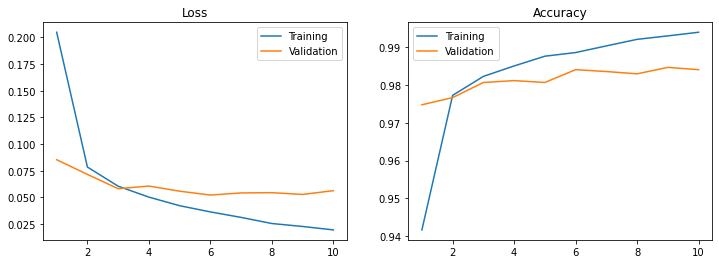

In [15]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

## Debug - Layer 시각화

In [16]:
# 모델 구조 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 2025/05/05 - Tensorflow 버전변경으로 인한 문법 변경

# 입력 텐서 형태 
model.inputs

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [18]:
# 2025/05/05 - Tensorflow 버전변경으로 인한 문법 변경

# 출력 텐서 형태 
model.outputs

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [19]:
# 레이어 
model.layers

In [20]:
# 첫번째 레이어 선택
model.layers[0]

In [21]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [22]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [30]:
model.layers[0].kernel[:,:,:,0]

<tf.Tensor: shape=(3, 3, 1), dtype=float32, numpy=
array([[[-0.6271702 ],
        [-0.6337193 ],
        [-0.50904346]],

       [[ 0.08443513],
        [ 0.14821665],
        [ 0.17565404]],

       [[ 0.44999036],
        [ 0.41083172],
        [ 0.30114576]]], dtype=float32)>

In [ ]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.40175235, -0.0142021 , -0.16541943,  0.07101345,
            0.13851653, -0.1466414 , -0.69844335, -0.6724889 ,
            0.18092819,  0.3085583 , -0.33449966,  0.30880442,
            0.03788541, -0.6169763 , -0.03348263, -0.91614956,
           -0.6573538 ,  0.615798  , -0.26420498,  0.30067775,
            0.626597  ,  0.05849747,  0.43824226, -0.6860424 ,
           -0.32064503,  0.3519042 , -0.68902236,  0.23335415,
            0.02019312, -0.12314849, -0.83600533, -0.04812527]],
 
         [[-0.39596477,  0.3397399 ,  0.06847089,  0.32318243,
            0.1844804 ,  0.3266587 , -0.28172982,  0.20127563,
            0.21139507,  0.05846153,  0.4536798 , -0.27042326,
           -0.74023753, -0.17366268,  0.45818216, -1.1425819 ,
           -0.31170124,  0.35981178, -0.09149241,  0.18872175,
            0.24093889,  0.3402946 ,  0.5517266 , -0.8892938 ,
           -0.08627857,  0.10505231, -0.31

In [ ]:
# 2025/05/05 - Tensorflow 버전변경으로 인한 문법 변경

# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.inputs[0], 
                           outputs=[layer.output for layer in model.layers[:2]] ) 
activations = activator.predict(x_train_in[0][tf.newaxis, ...]) 

len(activations)

2

In [ ]:
# 첫 번째 레이어(conv) 출력층 
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

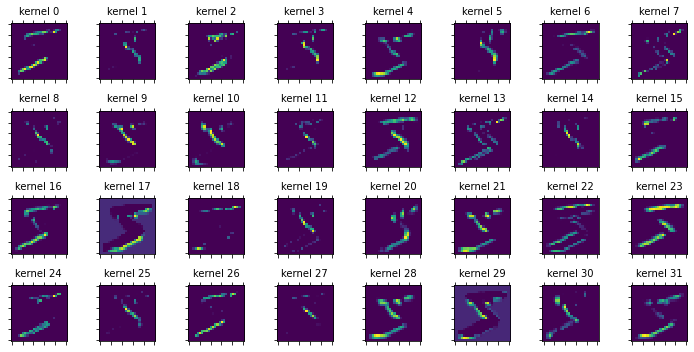

In [ ]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
# 두 번째 레이어(pool) 출력층 
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


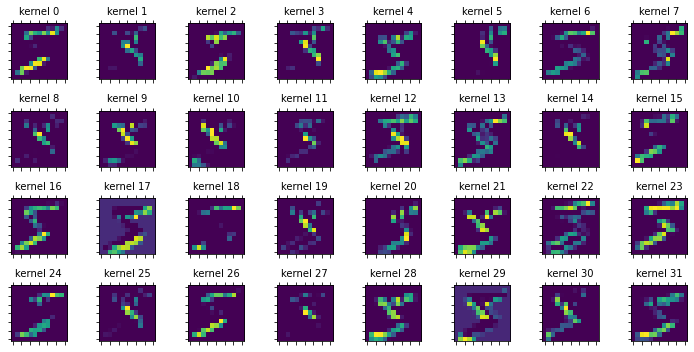

In [ ]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

# Data Augmentation

## Without Data Augmentation

### Import

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pylab as plt

### Dataset Load

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip

--2022-06-30 05:54:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 142.250.65.80, 142.250.188.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   358MB/s    in 0.2s    

2022-06-30 05:54:32 (358 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
!ls

cats_and_dogs_filtered.zip  sample_data


In [ ]:
import os
import zipfile

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

In [ ]:
!ls

cats_and_dogs_filtered	cats_and_dogs_filtered.zip  sample_data


In [ ]:
!ls ./cats_and_dogs_filtered	

train  validation  vectorize.py


In [ ]:
# 훈련 셋, 검증 셋 저장위치 지정
train_dir = "cats_and_dogs_filtered/train"
valid_dir = "cats_and_dogs_filtered/validation"
print(train_dir)
print(valid_dir)

cats_and_dogs_filtered/train
cats_and_dogs_filtered/validation


### Preprocessing

In [ ]:
# 이미지 데이터 제너레이터 정의 (Augmentation 미적용)
image_gen = ImageDataGenerator(rescale=(1/255.))
image_gen

In [ ]:
# flow_from_directory 함수로 폴더에서 이미지 가져와서 제너레이터 객체로 정리 
train_gen = image_gen.flow_from_directory(train_dir, 
                                          batch_size=32, 
                                          target_size=(224, 224),   
                                          classes=['cats','dogs'], 
                                          class_mode = 'binary',
                                          seed=2020)

valid_gen = image_gen.flow_from_directory(valid_dir,                                          
                                          batch_size=32, 
                                          target_size=(224, 224),   
                                          classes=['cats','dogs'], 
                                          class_mode = 'binary',
                                          seed=2020)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


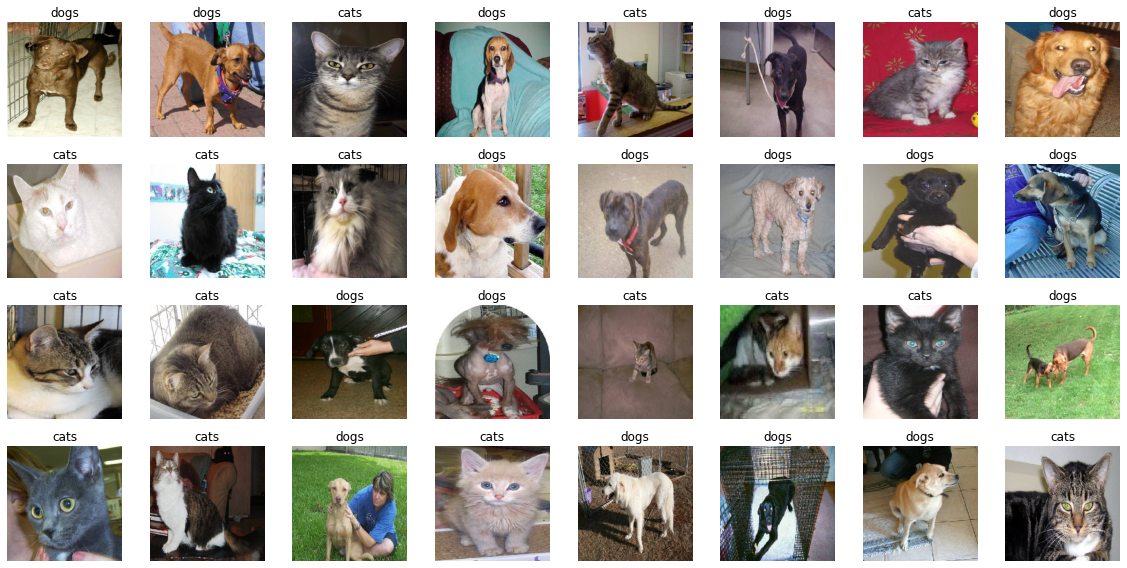

In [ ]:
# 2025/05/05 - Tensorflow 버전변경으로 인한 타입 에러 수정

# 샘플 이미지 출력
class_labels = ['cats', 'dogs']
batch = next(train_gen)
images, labels = batch[0], batch[1]

plt.figure(figsize=(16, 8))
for i in range(32):
    
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].astype(int)])
    plt.axis("off")
plt.tight_layout()
plt.show()

### Build Model

In [ ]:
# Sequential API를 사용하여 샘플 모델 생성

def build_model():

    model = tf.keras.Sequential([

        # Convolution 층 
        tf.keras.layers.Conv2D(32, (3, 3), padding='same'),        
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),

        tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),

        # Classifier 출력층 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'), 
        tf.keras.layers.Dropout(0.3),              
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    return model

model = build_model()

In [ ]:
# 2025/05/05 - Tensorflow 버전변경으로 인한 문법 변경

# 모델 컴파일
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Training

In [ ]:
# 모델 훈련
history = model.fit(train_gen, validation_data=valid_gen, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


63/63 [==============================] - 13s 173ms/step - loss: 8.3987 - accuracy: 0.5765 - val_loss: 0.6886 - val_accuracy: 0.4990
Epoch 2/20
63/63 [==============================] - 10s 163ms/step - loss: 0.6494 - accuracy: 0.6835 - val_loss: 0.7015 - val_accuracy: 0.5000
Epoch 3/20
63/63 [==============================] - 10s 163ms/step - loss: 0.5319 - accuracy: 0.7330 - val_loss: 0.7629 - val_accuracy: 0.5020
Epoch 4/20
63/63 [==============================] - 10s 162ms/step - loss: 0.4852 - accuracy: 0.7670 - val_loss: 0.7063 - val_accuracy: 0.5140
Epoch 5/20
63/63 [==============================] - 10s 163ms/step - loss: 0.4152 - accuracy: 0.8205 - val_loss: 0.7318 - val_accuracy: 0.5330
Epoch 6/20
63/63 [==============================] - 10s 162ms/step - loss: 0.3728 - accuracy: 0.8405 - val_loss: 0.7389 - val_accuracy: 0.5480
Epoch 7/20
63/63 [==============================] - 10s 160ms/step - loss: 0.3433 - accuracy: 0.8470 - val_loss: 0.6112 - val_accuracy: 0.6490
Epoch 8/20

### Evaluation

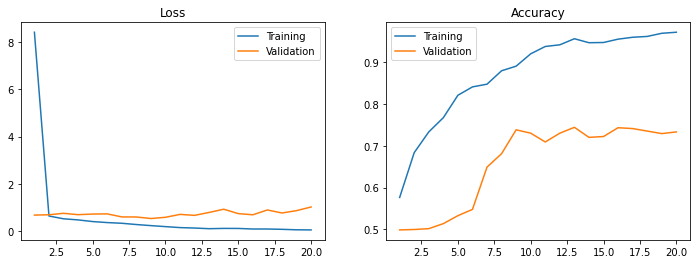

In [ ]:
# 손실함수, 정확도 그래프 그리기 
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 20)

## With Data Augmentation

### Preprocessing

In [ ]:
# 이미지 데이터 제너레이터 정의 (Augmentation 적용)
image_gen_aug = ImageDataGenerator(rescale=1/255., 
                                   horizontal_flip=True,
                                   rotation_range=35,                                
                                   zoom_range=0.2)

# flow_from_directory 함수로 폴더에서 이미지 가져와서 제너레이터 객체로 정리 
train_gen_aug = image_gen_aug.flow_from_directory(train_dir, 
                                                  batch_size=32, 
                                                  target_size=(224,224),   
                                                  classes=['cats','dogs'], 
                                                  class_mode = 'binary', 
                                                  seed=2020)

valid_gen_aug = image_gen_aug.flow_from_directory(valid_dir,  
                                                  batch_size=32, 
                                                  target_size=(224,224),   
                                                  classes=['cats','dogs'], 
                                                  class_mode = 'binary', 
                                                  seed=2020)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


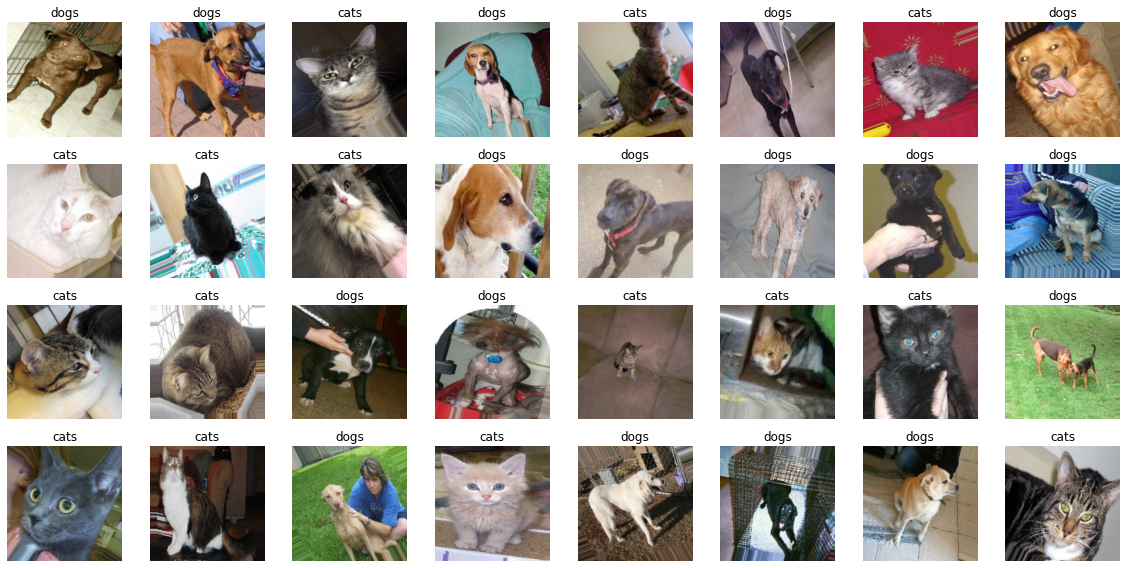

In [ ]:
# 2025/05/05 - Tensorflow 버전변경으로 인한 타입 에러 수정

# 샘플 이미지 출력
class_labels = ['cats', 'dogs']
batch = next(train_gen)
images, labels = batch[0], batch[1]

plt.figure(figsize=(16, 8))
for i in range(32):
    
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].astype(int)])
    plt.axis("off")
plt.tight_layout()
plt.show()

### Build Model

In [ ]:
# 모델 생성
model_aug = build_model()

# 모델 컴파일
model_aug.compile(optimizer=tf.optimizers.Adam(),  
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=['accuracy'])

### Training

In [ ]:
# 모델 훈련
history_aug = model_aug.fit(train_gen_aug, validation_data=valid_gen_aug, epochs=40)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


63/63 [==============================] - 37s 583ms/step - loss: 7.3948 - accuracy: 0.5595 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/40
63/63 [==============================] - 37s 591ms/step - loss: 0.6392 - accuracy: 0.6165 - val_loss: 0.6994 - val_accuracy: 0.5000
Epoch 3/40
63/63 [==============================] - 36s 576ms/step - loss: 0.6203 - accuracy: 0.6305 - val_loss: 0.7339 - val_accuracy: 0.5000
Epoch 4/40
63/63 [==============================] - 36s 573ms/step - loss: 0.6020 - accuracy: 0.6375 - val_loss: 0.6863 - val_accuracy: 0.5380
Epoch 5/40
63/63 [==============================] - 36s 573ms/step - loss: 0.5963 - accuracy: 0.6555 - val_loss: 0.7248 - val_accuracy: 0.5080
Epoch 6/40
63/63 [==============================] - 36s 573ms/step - loss: 0.6069 - accuracy: 0.6565 - val_loss: 0.6638 - val_accuracy: 0.5870
Epoch 7/40
63/63 [==============================] - 36s 578ms/step - loss: 0.5778 - accuracy: 0.6665 - val_loss: 0.6132 - val_accuracy: 0.6420
Epoch 8/40

### Evaluation

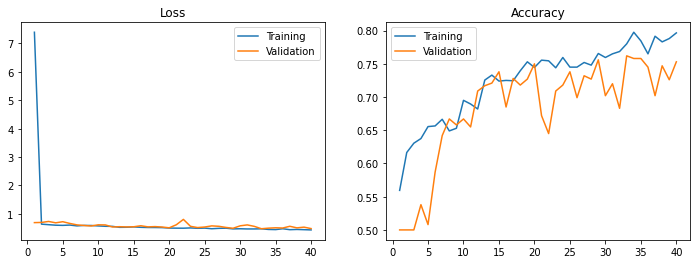

In [ ]:
# 손실함수, 정확도 그래프 그리기 
plot_loss_acc(history_aug, 40)

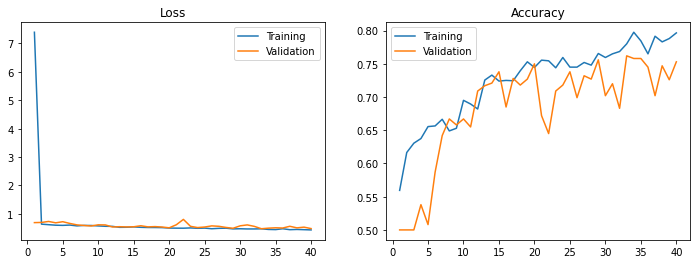

In [ ]:
# 손실함수, 정확도 그래프 그리기 
plot_loss_acc(history_aug, 40)

# Advanced Techniques - 모델 구조 

## Dataset Load

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Build Model

In [ ]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                              

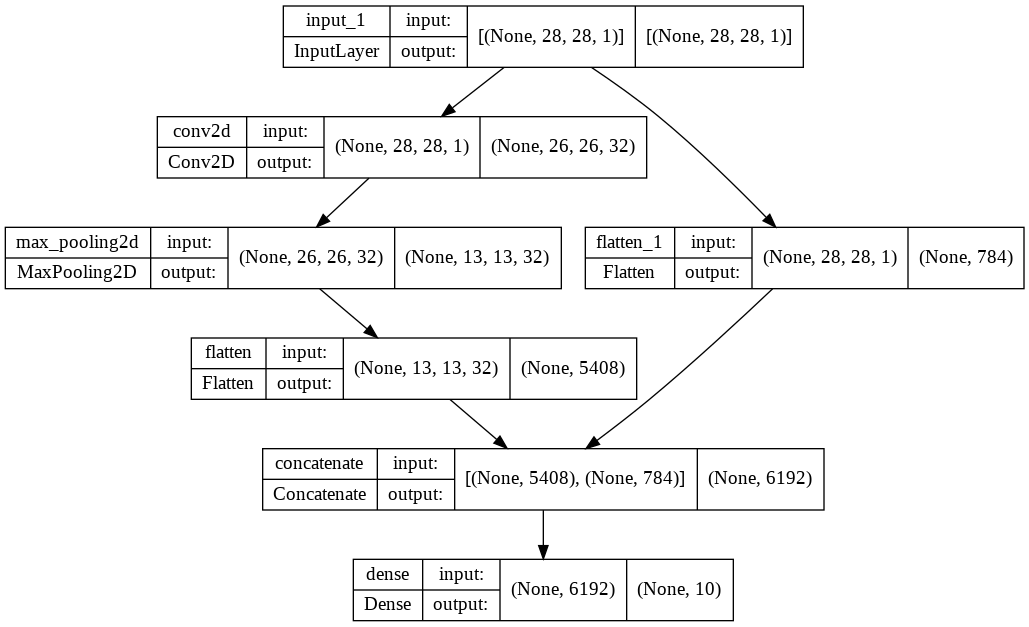

In [ ]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## Training

In [ ]:
# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2114 - accuracy: 0.9398 - val_loss: 0.0890 - val_accuracy: 0.9734
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0827 - accuracy: 0.9761 - val_loss: 0.0688 - val_accuracy: 0.9773
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0614 - accuracy: 0.9819 - val_loss: 0.0618 - val_accuracy: 0.9793
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0497 - accuracy: 0.9851 - val_loss: 0.0541 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0416 - accuracy: 0.9872 - val_loss: 0.0625 - val_accuracy: 0.9789
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.0652 - val_accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0569 -

## Evaluation

In [ ]:
# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0616 - accuracy: 0.9831
0.06155535951256752 0.9830999970436096


# Advanced Technique - Multi Output 구조

## Preprocessing

In [ ]:
# 새로운 출력값 배열을 생성 (홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [ ]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

## Build Model

In [ ]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

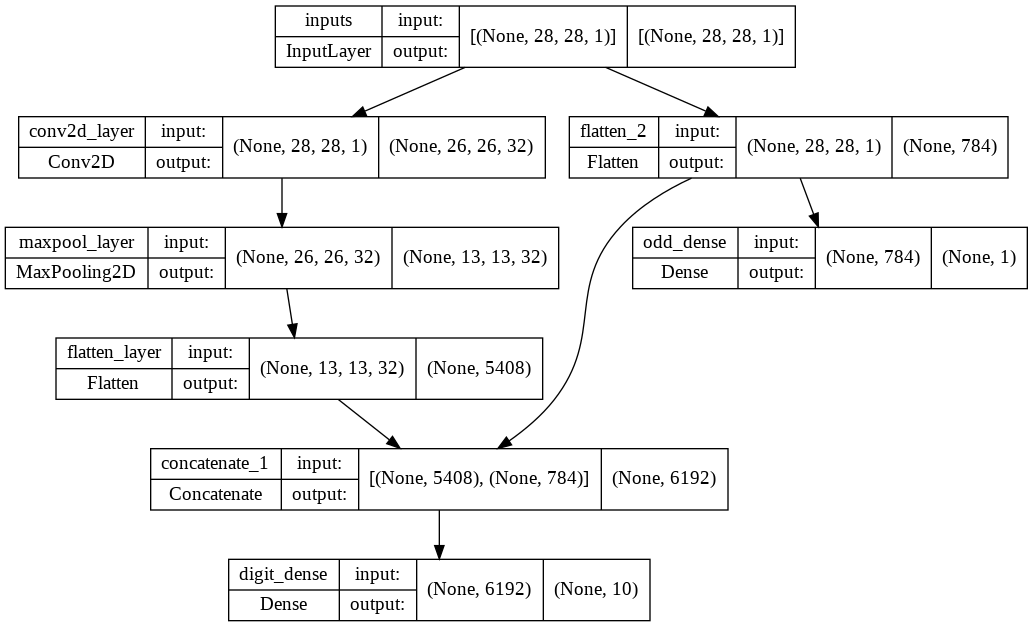

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [ ]:
# 2025/05/05 - Tensorflow 버전 변경에 따른 문법 수정

# 모델 컴파일
model.compile(optimizer='adam', 
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'}, 
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics={'digit_dense': ['accuracy'], 'odd_dense': ['accuracy']}) # 각 출력에 대한 metrics 지정

## Training

In [ ]:

# 모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd}, 
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3662 - digit_dense_loss: 0.2020 - odd_dense_loss: 0.3285 - digit_dense_accuracy: 0.9426 - odd_dense_accuracy: 0.8625 - val_loss: 0.2246 - val_digit_dense_loss: 0.0871 - val_odd_dense_loss: 0.2749 - val_digit_dense_accuracy: 0.9730 - val_odd_dense_accuracy: 0.8898
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2159 - digit_dense_loss: 0.0801 - odd_dense_loss: 0.2717 - digit_dense_accuracy: 0.9764 - odd_dense_accuracy: 0.8916 - val_loss: 0.1960 - val_digit_dense_loss: 0.0640 - val_odd_dense_loss: 0.2640 - val_digit_dense_accuracy: 0.9806 - val_odd_dense_accuracy: 0.8973
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1923 - digit_dense_loss: 0.0609 - odd_dense_loss: 0.2630 - digit_dense_accuracy: 0.9812 - odd_dense_accuracy: 0.8957 - val_loss: 0.1860 - val_digit_dense_loss: 0.0565 - val_odd_dense_loss: 0.2590 - val_digit_dense_accuracy: 0.9814 -

## Evaluation

In [ ]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 2s 6ms/step - loss: 0.1909 - digit_dense_loss: 0.0627 - odd_dense_loss: 0.2564 - digit_dense_accuracy: 0.9838 - odd_dense_accuracy: 0.9019


[0.19088611006736755,
 0.06268550455570221,
 0.2564011812210083,
 0.9837999939918518,
 0.9018999934196472]

7


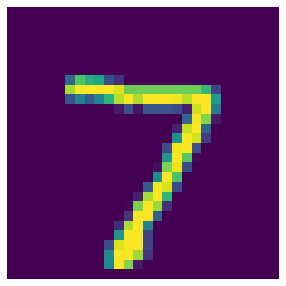

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

print(y_valid[0])
plot_image(x_valid, 0)

In [ ]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[2.5122160e-14 1.7734646e-10 5.8853078e-10 4.5630150e-06 8.1126154e-13
 9.7225190e-13 1.4516928e-21 9.9999547e-01 2.3767679e-10 3.7517780e-09]
[0.9995494]


In [ ]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
#2025/05/05 수정

odd_labels = (odd_preds > 0.5).astype(int).reshape(1, -1)[0]
odd_labels[0:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

# Advanced Technique - Transfer Learning

In [ ]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


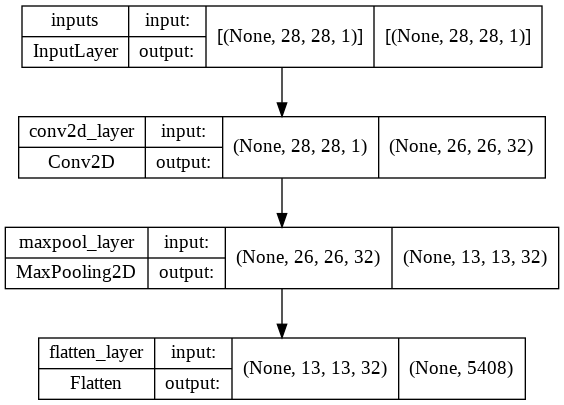

In [ ]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [ ]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


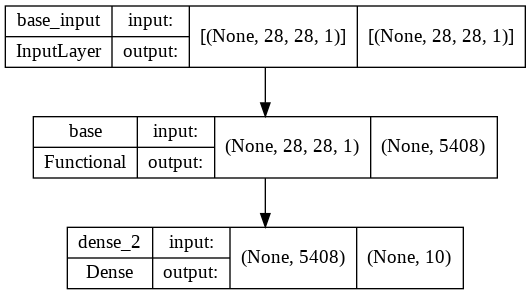

In [ ]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')


In [ ]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1287 - accuracy: 0.9637 - val_loss: 0.0676 - val_accuracy: 0.9779
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0571 - accuracy: 0.9830 - val_loss: 0.0523 - val_accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.0544 - val_accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.0517 - val_accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0294 - accuracy: 0.9906 - val_loss: 0.0504 - val_accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0241 - accuracy: 0.9927 - val_loss: 0.0624 - val_accuracy: 0.9810
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0201 - accuracy: 0.9940 - val_loss: 0.0612 -

In [ ]:
# 베이스 모델의 가중치를 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [ ]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [ ]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1170 - accuracy: 0.9693 - val_loss: 0.0566 - val_accuracy: 0.9826
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0487 - accuracy: 0.9858 - val_loss: 0.0469 - val_accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0358 - accuracy: 0.9893 - val_loss: 0.0483 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0281 - accuracy: 0.9918 - val_loss: 0.0498 - val_accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0216 - accuracy: 0.9934 - val_loss: 0.0545 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0183 - accuracy: 0.9947 - val_loss: 0.0461 - val_accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0149 - accuracy: 0.9956 - val_loss: 0.0541 - val_ac

In [ ]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [ ]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [ ]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1153 - accuracy: 0.9698 - val_loss: 0.0572 - val_accuracy: 0.9814
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0489 - accuracy: 0.9861 - val_loss: 0.0491 - val_accuracy: 0.9831
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0355 - accuracy: 0.9896 - val_loss: 0.0495 - val_accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0274 - accuracy: 0.9920 - val_loss: 0.0544 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0467 - val_accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0175 - accuracy: 0.9948 - val_loss: 0.0489 - val_accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0148 - accuracy: 0.9958 - val_loss: 0.0554 - val_ac